### Collecting data, importing libs

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import LabelEncoder
sns.set(style="ticks")

df = pd.read_excel(r'C:\Users\Anja\Desktop\Data mining Anja 36119\CoffeeAndCodeLT2018.xlsx')
df.head()

,CoffeeType,Gender,CoffeeCupsPerDay,CodingHours,CoffeeTime,CodingWithoutCoffee,CoffeeSolveBugs,AgeRange,Country
0,Caffè latte,Female,2,8,Before coding,Yes,Sometimes,18 to 29,Lebanon
1,Americano,Female,2,3,Before coding,Yes,Yes,30 to 39,Lebanon
2,Nescafe,Female,3,5,While coding,No,Yes,18 to 29,Lebanon
3,Nescafe,Male,2,8,Before coding,No,Yes,NaN,Lebanon
4,Turkish,Male,3,10,While coding,Sometimes,No,18 to 29,Lebanon


In [79]:
print("number of data: "+ str(len(df.index)))

number of data: 100


In [80]:
df.dtypes

CoffeeType             object
Gender                 object
CoffeeCupsPerDay        int64
CodingHours             int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeSolveBugs        object
AgeRange               object
Country                object
dtype: object

In [81]:
df.describe(include="all")

,CoffeeType,Gender,CoffeeCupsPerDay,CodingHours,CoffeeTime,CodingWithoutCoffee,CoffeeSolveBugs,AgeRange,Country
count,99,100,100.000000,100.000000,100,100,100,98,100
unique,8,2,NaN,NaN,7,3,3,5,1
top,Nescafe,Male,NaN,NaN,While coding,Sometimes,Sometimes,18 to 29,Lebanon
freq,32,74,NaN,NaN,61,51,43,60,100
mean,NaN,NaN,2.890000,6.410000,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.613673,2.644205,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.500000,7.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN


### Analyzing Data

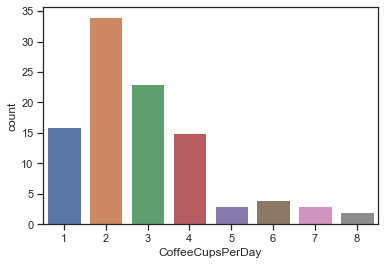

In [82]:
sns.countplot(x = "CoffeeCupsPerDay", data = df)

Nescafe                     0.323232
American Coffee             0.232323
Turkish                     0.191919
Espresso (Short Black)      0.080808
Cappuccino                  0.070707
Caffè latte                 0.050505
Double Espresso (Doppio)    0.030303
Americano                   0.020202
Name: CoffeeType, dtype: float64


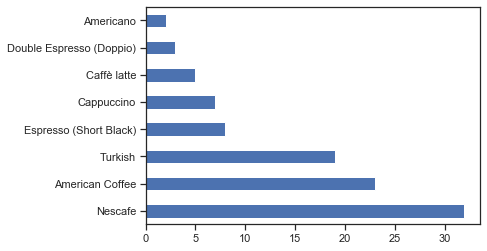

In [83]:
CoffeeCupsPerDay = df.CoffeeType
CoffeeCupsPerDay.value_counts().plot(kind='barh')
print (CoffeeCupsPerDay.value_counts(normalize=True))

2    34
3    23
1    16
4    15
6     4
7     3
5     3
8     2
Name: CoffeeCupsPerDay, dtype: int64


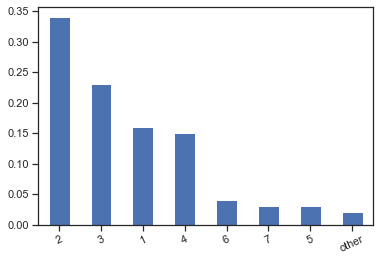

In [84]:
CoffeeCupsPerDay = df["CoffeeCupsPerDay"]
print (CoffeeCupsPerDay.value_counts())
prob= CoffeeCupsPerDay.value_counts(normalize=True)
threshold = 0.02
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

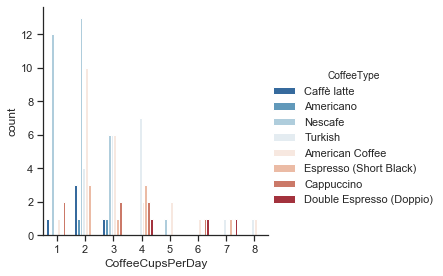

In [85]:
g = sns.catplot(x="CoffeeCupsPerDay", hue="CoffeeType",
                data=df, kind="count",
                height=4, aspect=.99, sharex=False, sharey=False, palette="RdBu_r");

In [86]:
#Da li žene ili muškarci količinski više konzumiraju kafu?

cups_by_gender = df.pivot_table(columns='Gender', values='CoffeeCupsPerDay', aggfunc={'mean', 'count', 'min', 'max'})
cups_by_gender.head()

Gender,Female,Male
count,26.000000,74.000000
max,7.000000,8.000000
mean,2.269231,3.108108
min,1.000000,1.000000


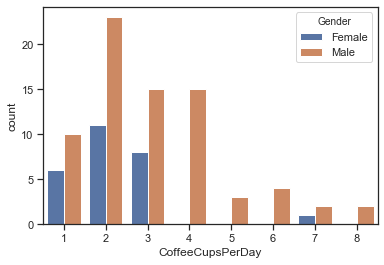

In [87]:
sns.countplot(x = "CoffeeCupsPerDay", hue = "Gender", data = df)

In [88]:
# Problem: Da li je uticaj kafe isti na muškarce i žene?

df.groupby(['Gender', 'CodingWithoutCoffee', 'CoffeeSolveBugs']).CoffeeCupsPerDay.agg(['mean','count', 'min', 'max'])

mean  count  min  max
Gender CodingWithoutCoffee CoffeeSolveBugs                           
Female No                  No               2.000000      1    2    2
                           Sometimes        2.000000      1    2    2
                           Yes              2.666667      3    2    3
       Sometimes           No               1.500000      2    1    2
                           Sometimes        2.333333      9    1    3
                           Yes              2.000000      1    2    2
       Yes                 No               1.500000      4    1    3
                           Sometimes        1.500000      2    1    2
                           Yes              4.000000      3    2    7
Male   No                  No               3.000000      3    3    3
                           Sometimes        5.750000      4    4    8
                           Yes              4.714286      7    2    8
       Sometimes           No               3.875000      8    2    6
                           Sometimes        2.684211     19    1    4
                           Yes              3.500000     12    2    5
       Yes                 No               1.555556      9    1    2
                           Sometimes        2.500000      8    1    4
                           Yes              1.750000      4    1    3

In [89]:
# Problem: Da li je uticaj kafe isti na muškarce i žene?

group_by_gender = df.groupby(['Gender', 'CodingWithoutCoffee', 'CoffeeSolveBugs'])
group_by_gender.size().unstack().reset_index()

CoffeeSolveBugs,Gender,CodingWithoutCoffee,No,Sometimes,Yes
0,Female,No,1,1,3
1,Female,Sometimes,2,9,1
2,Female,Yes,4,2,3
3,Male,No,3,4,7
4,Male,Sometimes,8,19,12
5,Male,Yes,9,8,4


In [90]:
# Outliners - greske prilikom davanja podataka, osobe koje kazu da ne piju kafu dok kodiraju za vreme konzumiranja stave dok kodiraju

df.groupby(['Gender', 'CodingWithoutCoffee', 'CoffeeSolveBugs', 'CoffeeTime']).CoffeeCupsPerDay.agg(['mean','count', 'min', 'max'])

mean  \
Gender CodingWithoutCoffee CoffeeSolveBugs CoffeeTime                          
Female No                  No              Before coding            2.000000   
                           Sometimes       While coding             2.000000   
                           Yes             While coding             2.666667   
       Sometimes           No              While coding             1.500000   
                           Sometimes       Before coding            1.666667   
                                           While coding             2.666667   
                           Yes             Before coding            2.000000   
       Yes                 No              Before coding            1.000000   
                                           In the morning           1.000000   
                                           While coding             3.000000   
                           Sometimes       Before coding            2.000000   
                                           In the morning           1.000000   
                           Yes             After coding             7.000000   
                                           Before coding            2.000000   
                                           While coding             3.000000   
Male   No                  No              While coding             3.000000   
                           Sometimes       Before and while coding  7.000000   
                                           While coding             5.333333   
                           Yes             All the time             7.000000   
                                           Before and while coding  3.000000   
                                           Before coding            3.000000   
       Sometimes           No              Before coding            4.000000   
                                           While coding             3.857143   
                           Sometimes       All the time             3.000000   
                                           Before and while coding  4.000000   
                                           Before coding            2.500000   
                                           While coding             2.615385   
                           Yes             Before coding            2.500000   
                                           While coding             3.700000   
       Yes                 No              Before coding            1.250000   
                                           While coding             1.800000   
                           Sometimes       After coding             2.000000   
                                           Before coding            1.000000   
                                           No specific time         4.000000   
                                           While coding             2.600000   
                           Yes             Before coding            2.000000   
                                           While coding             1.000000   

                                                                    count  \
Gender CodingWithoutCoffee CoffeeSolveBugs CoffeeTime                       
Female No                  No              Before coding                1   
                           Sometimes       While coding                 1   
                           Yes             While coding                 3   
       Sometimes           No              While coding                 2   
                           Sometimes       Before coding                3   
                                           While coding                 6   
                           Yes             Before coding                1   
       Yes                 No              Before coding                1   
                                           In the morning               2   
                                           While coding                 1   
                           

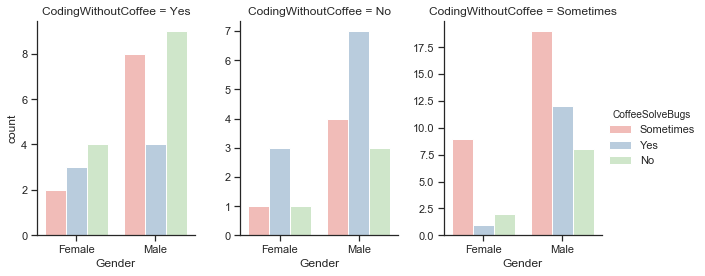

In [91]:
g = sns.catplot(x="Gender", hue="CoffeeSolveBugs", col="CodingWithoutCoffee",
                data=df, kind="count",
                height=4, aspect=.7, sharex=False, sharey=False, palette="Pastel1");

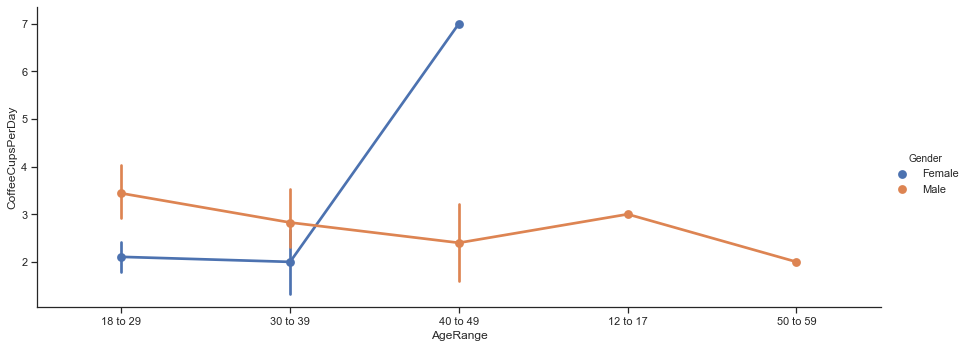

In [92]:
sns.catplot(x="AgeRange",y="CoffeeCupsPerDay",data=df,hue="Gender",aspect=2.5,kind="point")

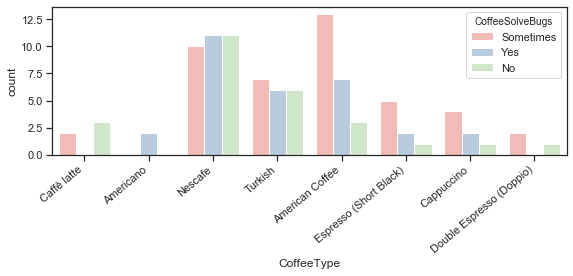

In [93]:
#Da li različite vrste kafe daju različiti uticaj na uspešnost programiranja?

plt.figure(figsize=(8,4))
ax = sns.countplot(x = "CoffeeType", hue = "CoffeeSolveBugs", data = df, palette="Pastel1") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

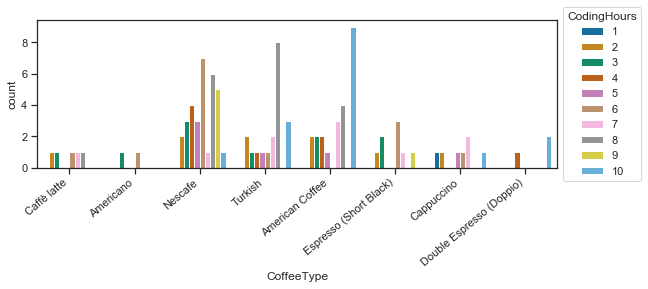

In [94]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x = "CoffeeType", hue = "CodingHours", data = df, palette="colorblind") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5), title='CodingHours')
plt.show()

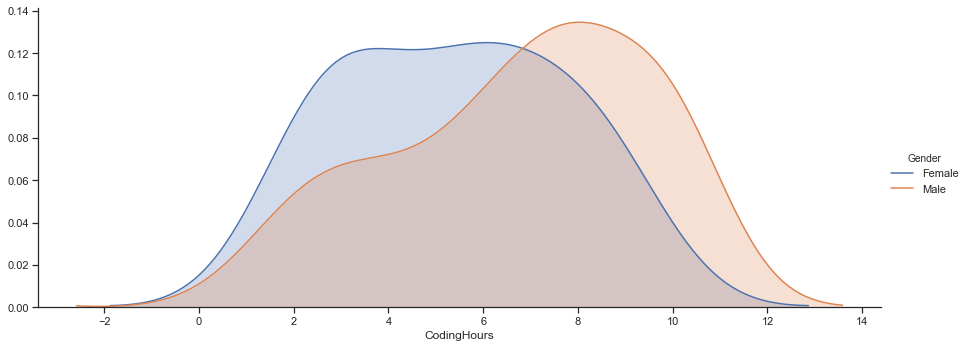

In [95]:
sns.FacetGrid(hue="Gender",data=df,aspect=2.5,height=5).map(sns.kdeplot,"CodingHours",shade=True).add_legend()

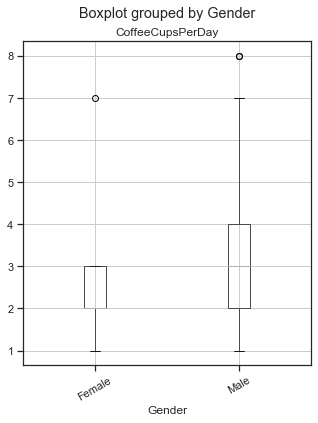

In [96]:
df.boxplot('CoffeeCupsPerDay','Gender',rot = 30,figsize=(5,6))

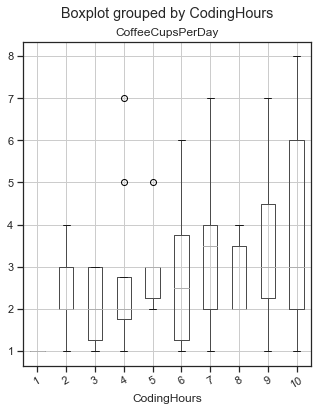

In [150]:
df.boxplot('CoffeeCupsPerDay','CodingHours',rot = 30,figsize=(5,6))

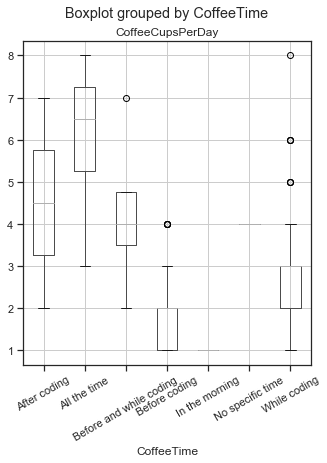

In [97]:
df.boxplot('CoffeeCupsPerDay','CoffeeTime',rot = 30,figsize=(5,6))

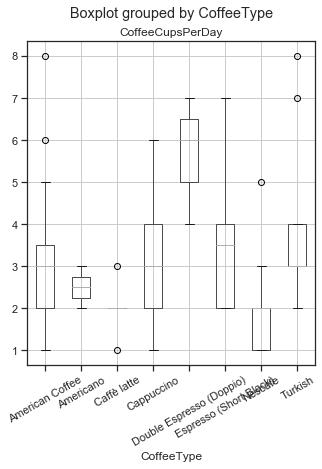

In [98]:
df.boxplot('CoffeeCupsPerDay','CoffeeType',rot = 30,figsize=(5,6))

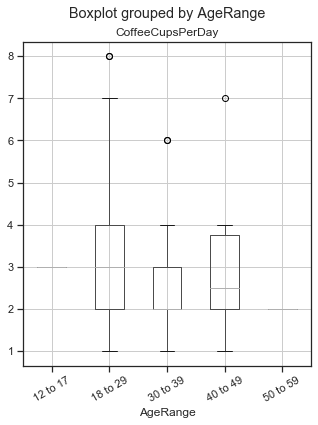

In [99]:
df.boxplot('CoffeeCupsPerDay','AgeRange',rot = 30,figsize=(5,6))

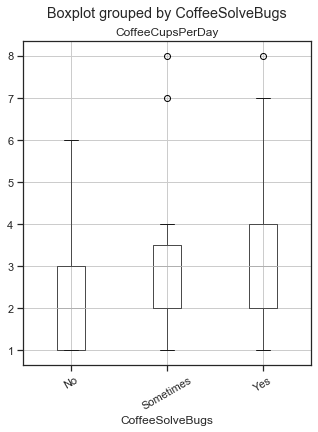

In [100]:
df.boxplot('CoffeeCupsPerDay','CoffeeSolveBugs',rot = 30,figsize=(5,6))

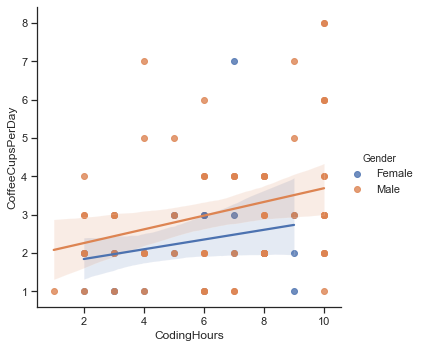

In [101]:
sns.lmplot(x="CodingHours",y="CoffeeCupsPerDay",hue="Gender",data=df)

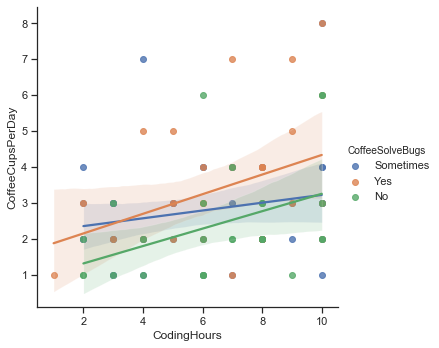

In [102]:
sns.lmplot(x="CodingHours",y="CoffeeCupsPerDay",hue="CoffeeSolveBugs",data=df)

### Data Wrangling

In [103]:
print(df.isnull().sum())

CoffeeType             1
Gender                 0
CoffeeCupsPerDay       0
CodingHours            0
CoffeeTime             0
CodingWithoutCoffee    0
CoffeeSolveBugs        0
AgeRange               2
Country                0
dtype: int64


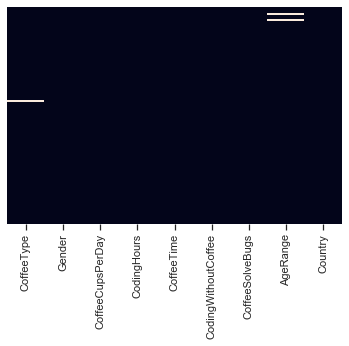

In [104]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [105]:
df['CoffeeType'] = df['CoffeeType'].fillna(df['CoffeeType'].value_counts().index[0])

In [106]:
print(df.isnull().values.sum())

2


In [107]:
df['AgeRange'] = df['AgeRange'].fillna(df['AgeRange'].value_counts().index[0])

In [108]:
print(df.isnull().values.sum())

0


In [109]:
print("number of data: "+ str(len(df.index)))

number of data: 100


In [110]:
df.drop('Country', axis=1, inplace=True)

In [111]:
df.head()

,CoffeeType,Gender,CoffeeCupsPerDay,CodingHours,CoffeeTime,CodingWithoutCoffee,CoffeeSolveBugs,AgeRange
0,Caffè latte,Female,2,8,Before coding,Yes,Sometimes,18 to 29
1,Americano,Female,2,3,Before coding,Yes,Yes,30 to 39
2,Nescafe,Female,3,5,While coding,No,Yes,18 to 29
3,Nescafe,Male,2,8,Before coding,No,Yes,18 to 29
4,Turkish,Male,3,10,While coding,Sometimes,No,18 to 29


In [112]:
df.dtypes

CoffeeType             object
Gender                 object
CoffeeCupsPerDay        int64
CodingHours             int64
CoffeeTime             object
CodingWithoutCoffee    object
CoffeeSolveBugs        object
AgeRange               object
dtype: object

In [113]:
df["CoffeeTime"] = df["CoffeeTime"].astype('category')
df["CodingWithoutCoffee"] = df["CodingWithoutCoffee"].astype('category')
df["CoffeeSolveBugs"] = df["CoffeeSolveBugs"].astype('category')
df["CoffeeType"] = df["CoffeeType"].astype('category')
df.dtypes

CoffeeType             category
Gender                   object
CoffeeCupsPerDay          int64
CodingHours               int64
CoffeeTime             category
CodingWithoutCoffee    category
CoffeeSolveBugs        category
AgeRange                 object
dtype: object

In [114]:
lb_make = LabelEncoder()
df["CoffeeType_code"] = lb_make.fit_transform(df["CoffeeType"])

In [115]:
code = df["CoffeeType_code"].unique()
real =  df["CoffeeType"].unique()
print('CoffeeType')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

CoffeeType
 
2     Caffè latte    
1     Americano      
6     Nescafe        
7     Turkish        
0     American Coffee
5     Espresso (Short Black)
3     Cappuccino     
4     Double Espresso (Doppio)


In [116]:
df["CodingWithoutCoffee_code"] = df["CodingWithoutCoffee"].cat.codes

In [117]:
code = df["CodingWithoutCoffee_code"].unique()
real =  df["CodingWithoutCoffee"].unique()
print('CodingWithoutCoffee')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

CodingWithoutCoffee
 
2     Yes            
0     No             
1     Sometimes      


In [118]:
df["CoffeeSolveBugs_code"] = df["CoffeeSolveBugs"].cat.codes

In [119]:
code = df["CoffeeSolveBugs_code"].unique()
real =  df["CoffeeSolveBugs"].unique()
print('CoffeeSolveBugs')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

CoffeeSolveBugs
 
1     Sometimes      
2     Yes            
0     No             


In [120]:
df.head()

,CoffeeType,Gender,CoffeeCupsPerDay,CodingHours,CoffeeTime,CodingWithoutCoffee,CoffeeSolveBugs,AgeRange,CoffeeType_code,CodingWithoutCoffee_code,CoffeeSolveBugs_code
0,Caffè latte,Female,2,8,Before coding,Yes,Sometimes,18 to 29,2,2,1
1,Americano,Female,2,3,Before coding,Yes,Yes,30 to 39,1,2,2
2,Nescafe,Female,3,5,While coding,No,Yes,18 to 29,6,0,2
3,Nescafe,Male,2,8,Before coding,No,Yes,18 to 29,6,0,2
4,Turkish,Male,3,10,While coding,Sometimes,No,18 to 29,7,1,0


In [121]:
df["Gender_code"] = np.where(df["Gender"].str.contains("Fe"), 0, 1)

In [122]:
code = df["Gender_code"].unique()
real =  df["Gender"].unique()
print('Gender')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

Gender
 
0     Female         
1     Male           


In [123]:
df_age = pd.DataFrame({'AgeRange': ['12 to 17', '18 to 29', '30 to 39', '40 to 49','50 to 59']})

def split_mean(x):
    split_list = x.split(' to ')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

df['Age_mean'] = df['AgeRange'].apply(lambda x: split_mean(x))

In [124]:
code = df["Age_mean"].unique()
real =  df["AgeRange"].unique()
print('AgeRange')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

AgeRange
 
23.5     18 to 29       
34.5     30 to 39       
44.5     40 to 49       
14.5     12 to 17       
54.5     50 to 59       


In [125]:
df['CoffeeTime_code'] = df['CoffeeTime'].map( {'No specific time':0, 'In the morning':1, 'Before coding':2, 
                                               'Before and while coding':3, 'While coding':4, 'After coding':5, 
                                               'All the time':6  })

In [126]:
code = df["CoffeeTime_code"].unique()
real =  df["CoffeeTime"].unique()
print('CoffeeTime')
print(' ')
for c,r in zip(code,real):
    print( '{:>0}     {:<15}'.format(c,r))

CoffeeTime
 
2     Before coding  
4     While coding   
3     Before and while coding
1     In the morning 
6     All the time   
5     After coding   
0     No specific time


In [127]:
df.drop('AgeRange', axis=1, inplace=True)
df.drop('CodingWithoutCoffee', axis=1, inplace=True)
df.drop('CoffeeSolveBugs', axis=1, inplace=True)
df.drop('CoffeeType', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('CoffeeTime', axis=1, inplace=True)

In [128]:
df.head()

,CoffeeCupsPerDay,CodingHours,CoffeeType_code,CodingWithoutCoffee_code,CoffeeSolveBugs_code,Gender_code,Age_mean,CoffeeTime_code
0,2,8,2,2,1,0,23.5,2
1,2,3,1,2,2,0,34.5,2
2,3,5,6,0,2,0,23.5,4
3,2,8,6,0,2,1,23.5,2
4,3,10,7,1,0,1,23.5,4


### Model Development, Train data, Predictions

In [129]:
df.corr()

,CoffeeCupsPerDay,CodingHours,CoffeeType_code,CodingWithoutCoffee_code,CoffeeSolveBugs_code,Gender_code,Age_mean
CoffeeCupsPerDay,1.000000,0.313692,-0.042295,-0.421552,0.250406,0.229175,-0.060245
CodingHours,0.313692,1.000000,-0.055981,-0.189742,0.049225,0.231018,-0.174153
CoffeeType_code,-0.042295,-0.055981,1.000000,0.044377,-0.091203,-0.007130,0.121414
CodingWithoutCoffee_code,-0.421552,-0.189742,0.044377,1.000000,-0.236429,-0.037595,0.226343
CoffeeSolveBugs_code,0.250406,0.049225,-0.091203,-0.236429,1.000000,0.023572,-0.060298
Gender_code,0.229175,0.231018,-0.007130,-0.037595,0.023572,1.000000,0.101614
Age_mean,-0.060245,-0.174153,0.121414,0.226343,-0.060298,0.101614,1.000000


In [130]:
prediction_df = df[['CoffeeCupsPerDay','Gender_code', 'CodingHours']]
prediction_df.head()

,CoffeeCupsPerDay,Gender_code,CodingHours
0,2,0,8
1,2,0,3
2,3,0,5
3,2,1,8
4,3,1,10


In [131]:
prediction_df.corr()

,CoffeeCupsPerDay,Gender_code,CodingHours
CoffeeCupsPerDay,1.000000,0.229175,0.313692
Gender_code,0.229175,1.000000,0.231018
CodingHours,0.313692,0.231018,1.000000


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = prediction_df.values
X, y = data[:,1:3], data[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred =classifier.predict(X_test)

accuracy_score(y_test, y_pred)*100

32.0

In [144]:
#Accuracy of Model with Cross Validation 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

data = prediction_df.values
X, y = data[:,1:3], data[:, 0]

model = svm.SVC(C=1, kernel='linear')
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 2)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

model.fit(X, y)
print('Broj kafa: ', model.predict([[1, 6]]))

[0.34 0.34]
Accuracy of Model with Cross Validation is: 34.0
Broj kafa:  [2]


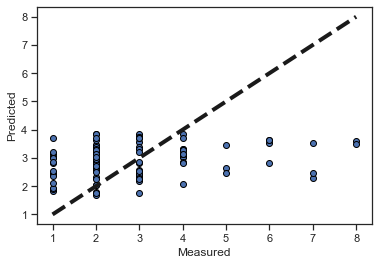

In [134]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

lr = linear_model.LinearRegression()
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [135]:
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

data = prediction_df.values
X, y = data[:,1:3], data[:, 0]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)


models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 2)
    print(accuracy)
    #get the mean of each fold 
    print("Accuracy of", name, "Model with Cross Validation is:",accuracy.mean() * 100)
    
   

[0.32 0.34]
Accuracy of LR Model with Cross Validation is: 33.0
[0.26 0.32]
Accuracy of KNN Model with Cross Validation is: 29.000000000000004
[0.34 0.34]
Accuracy of CART Model with Cross Validation is: 34.0
[0.18 0.24]
Accuracy of NB Model with Cross Validation is: 21.0
[0.34 0.34]
Accuracy of SVM Model with Cross Validation is: 34.0


C:\Users\Anja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Anja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

### Application

In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

data = prediction_df.values
X, y = data[:,1:3], data[:, 0]
model = svm.SVC(C=1, kernel='linear')
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 2)

model.fit(X, y)


root= tk.Tk()
root.title("Predvidjanje")
root.iconbitmap(r'C:\Users\Anja\Desktop\Data mining Anja 36119\favicon.ico')

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

label1 = tk.Label(root, text='Type CodingHours: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

label2 = tk.Label(root, text=' Type Gender_code (0 - female, 1 - male): ')
canvas1.create_window(100, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_CodingHours #our 1st input variable
    New_CodingHours = float(entry1.get()) 
    
    global New_Gender_code #our 2nd input variable
    New_Gender_code = float(entry2.get()) 
    
    Prediction_result  = ('Predicted CoffeeCupsPerDay: ', model.predict([[New_CodingHours ,New_Gender_code]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='#c7f2fc')
    canvas1.create_window(260, 190, window=label_Prediction)

button1 = tk.Button (root, text='Predict CoffeeCupsPerDay',command=values, bg='#c7f2fc') 
canvas1.create_window(270, 150, window=button1)

#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(prediction_df['CodingHours'].astype(float),df['CoffeeCupsPerDay'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['CoffeeCupsPerDay']) 
ax3.set_xlabel('CodingHours')
ax3.set_title('CodingHours Vs. CoffeeCupsPerDay')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(df['Gender_code'].astype(float),df['CoffeeCupsPerDay'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['CoffeeCupsPerDay']) 
ax4.set_xlabel('Gender_code')
ax4.set_title('Gender_code Vs. CoffeeCupsPerDay')

root.mainloop()